# Baseball Case Study
### Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W) 

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
Baseball_data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
Baseball_data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# Understanding the data

In [3]:
# Description of data_set
Baseball_data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [4]:
Baseball_data.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

## Exploratory Data Analysis

In [5]:
#Checking shape of dataset
Baseball_data.shape

(30, 17)

In [6]:
# checking for duplicate values
Baseball_data.duplicated().sum()

0

In [7]:
#Checking for null values 
Baseball_data.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

## Data Visualization

### univariate Analysis(for every column)

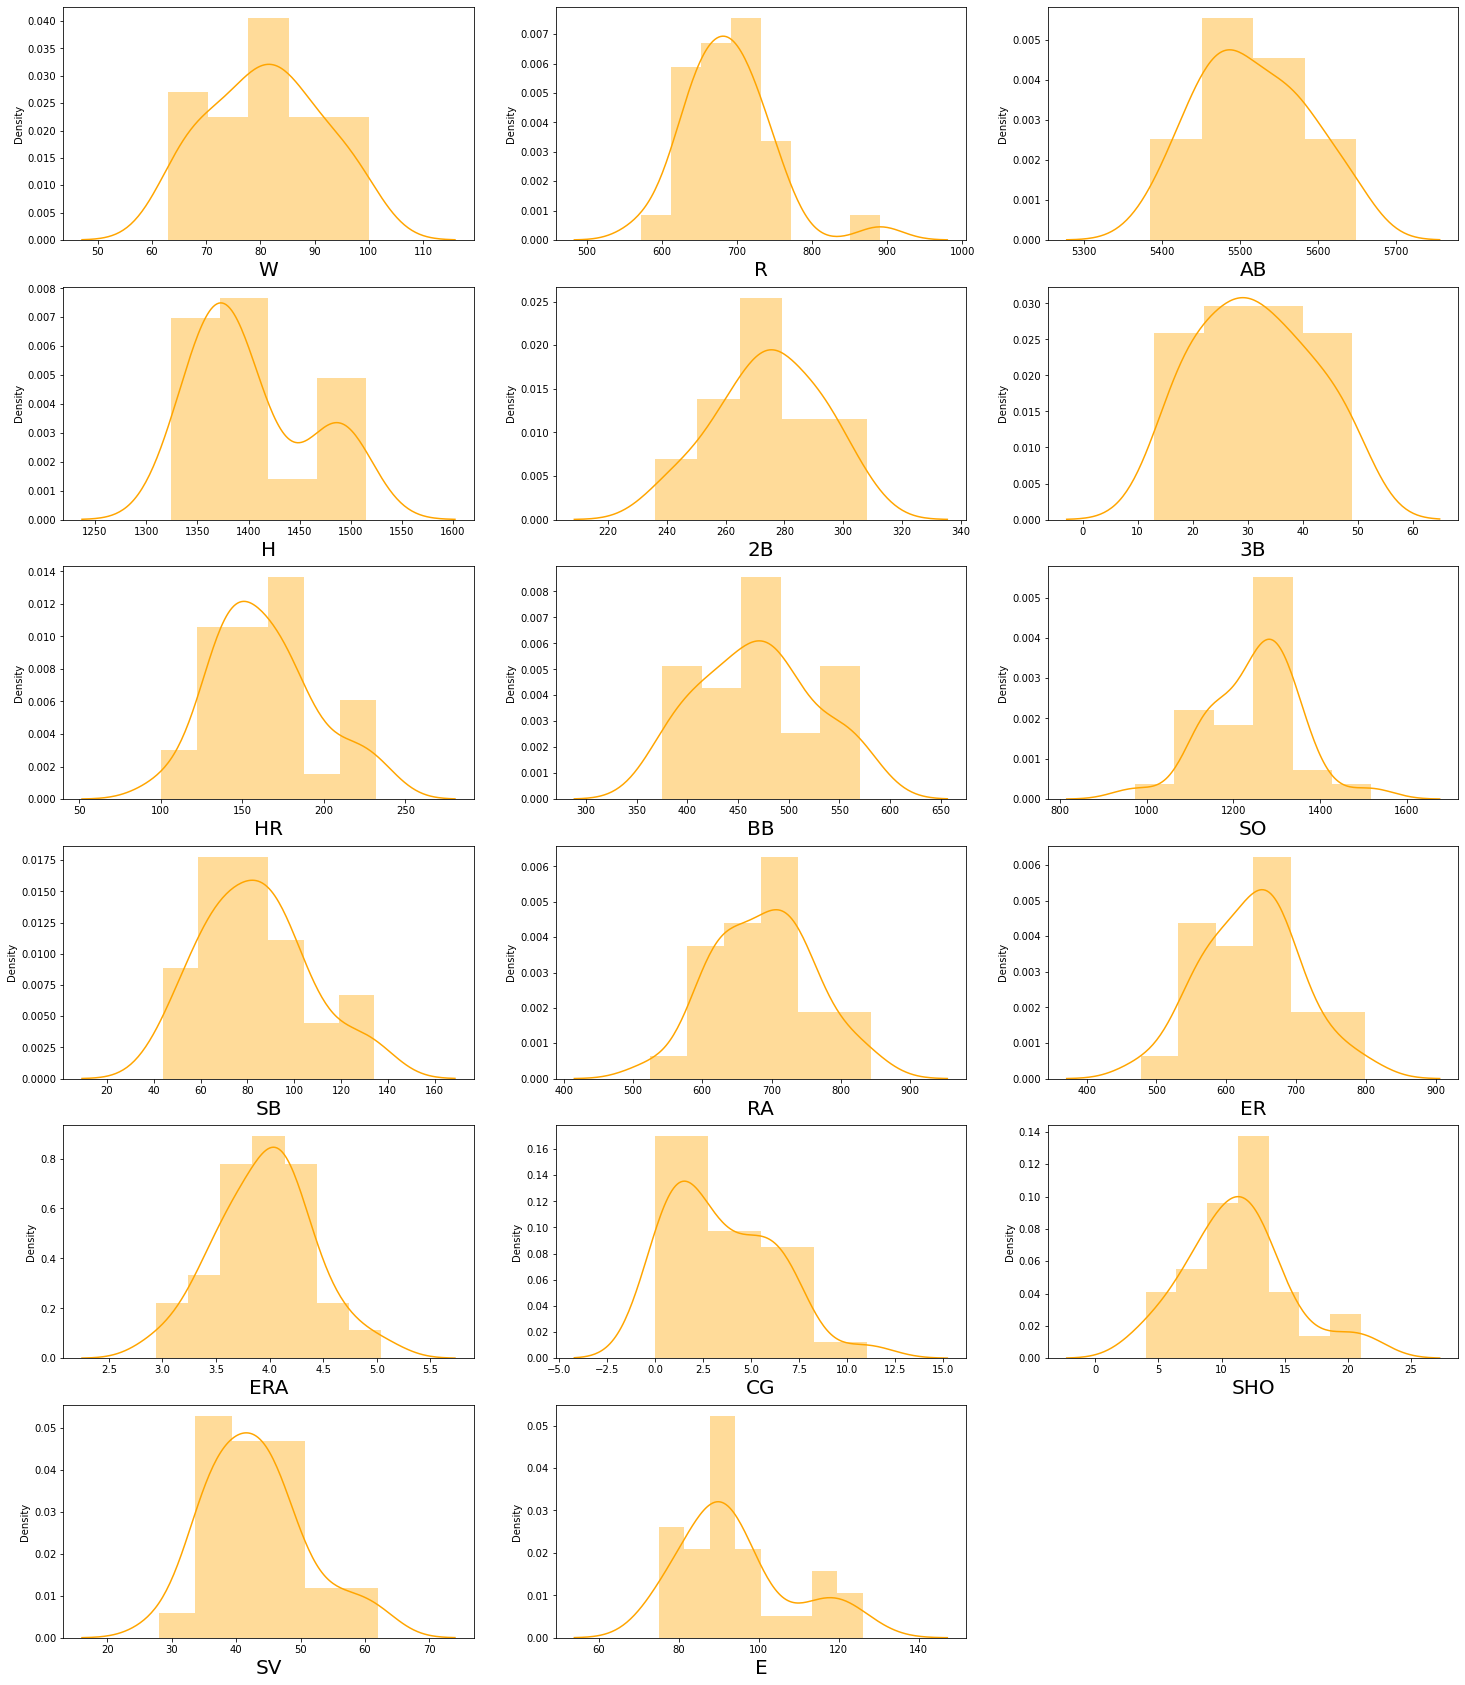

In [8]:
# distribution of data by density
plt.figure(figsize = (25,30))
plotnumber = 1

for col in Baseball_data:
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(Baseball_data[col], color = 'Orange')
        plt.xlabel(col,fontsize=20)
        
    plotnumber +=1
plt.show()

observation: columns that are not normally distributed R,SO,CG and E.

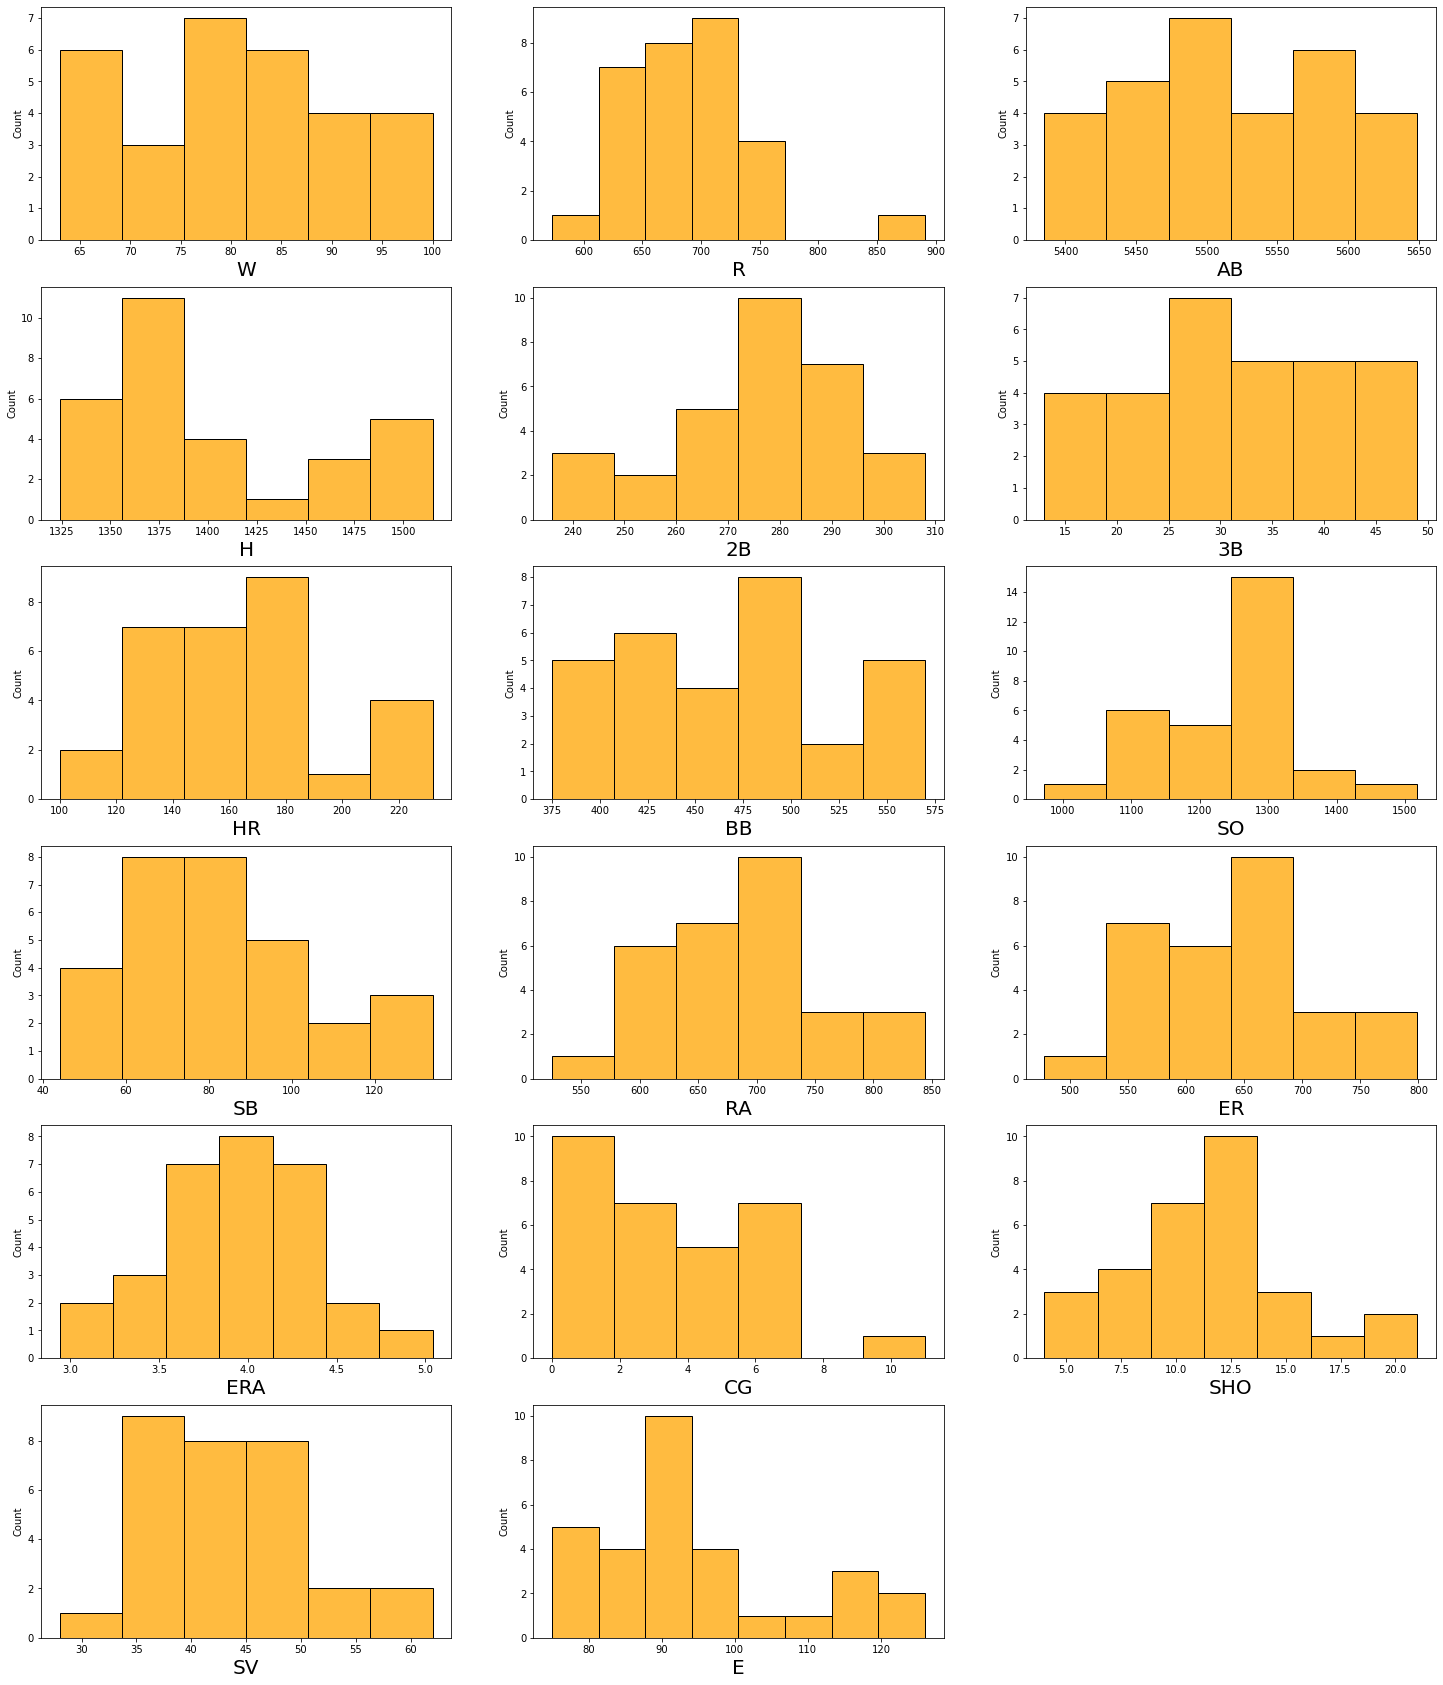

In [9]:
# distribution of data by histogram
plt.figure(figsize = (25,30))
plotnumber = 1

for col in Baseball_data:
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.histplot(Baseball_data[col], color = 'Orange')
        plt.xlabel(col,fontsize=20)
        
    plotnumber +=1
plt.show()

observation: columns that are not normally distributed R,SO,CG and E confirmed

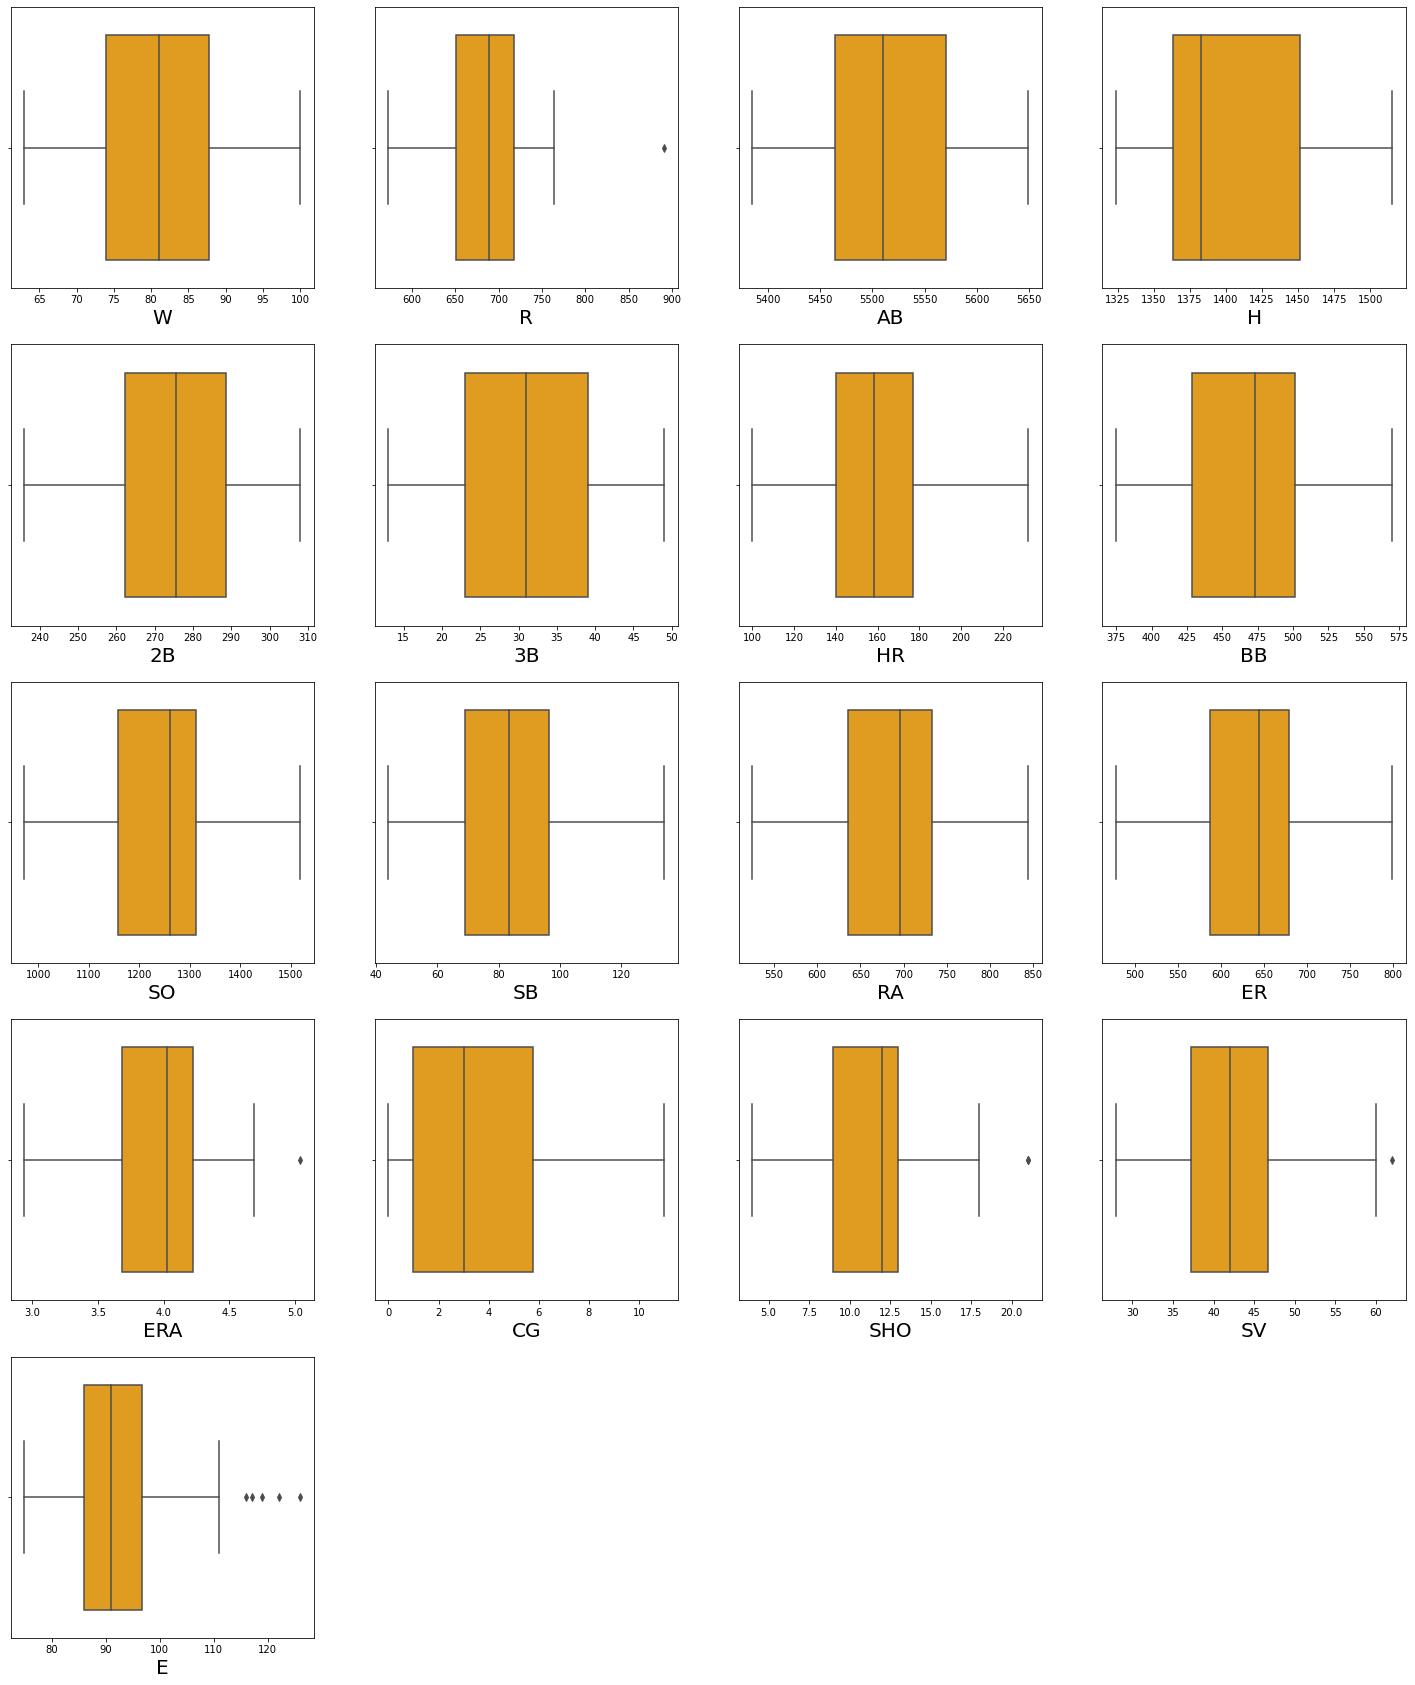

In [10]:
## checking for Outliers
plt.figure(figsize = (25,30))
plotnumber = 1

for col in Baseball_data:
    if plotnumber <=17:
        ax = plt.subplot(5,4,plotnumber)
        sns.boxplot(Baseball_data[col], color = 'Orange')
        plt.xlabel(col,fontsize=20)
        
    plotnumber +=1
plt.show()

conclusion from Boxplot: R,ERA,SHO,SV and E independent variable have outliers in it.

## Bivariate analysis of W(dependent variable) with other variables

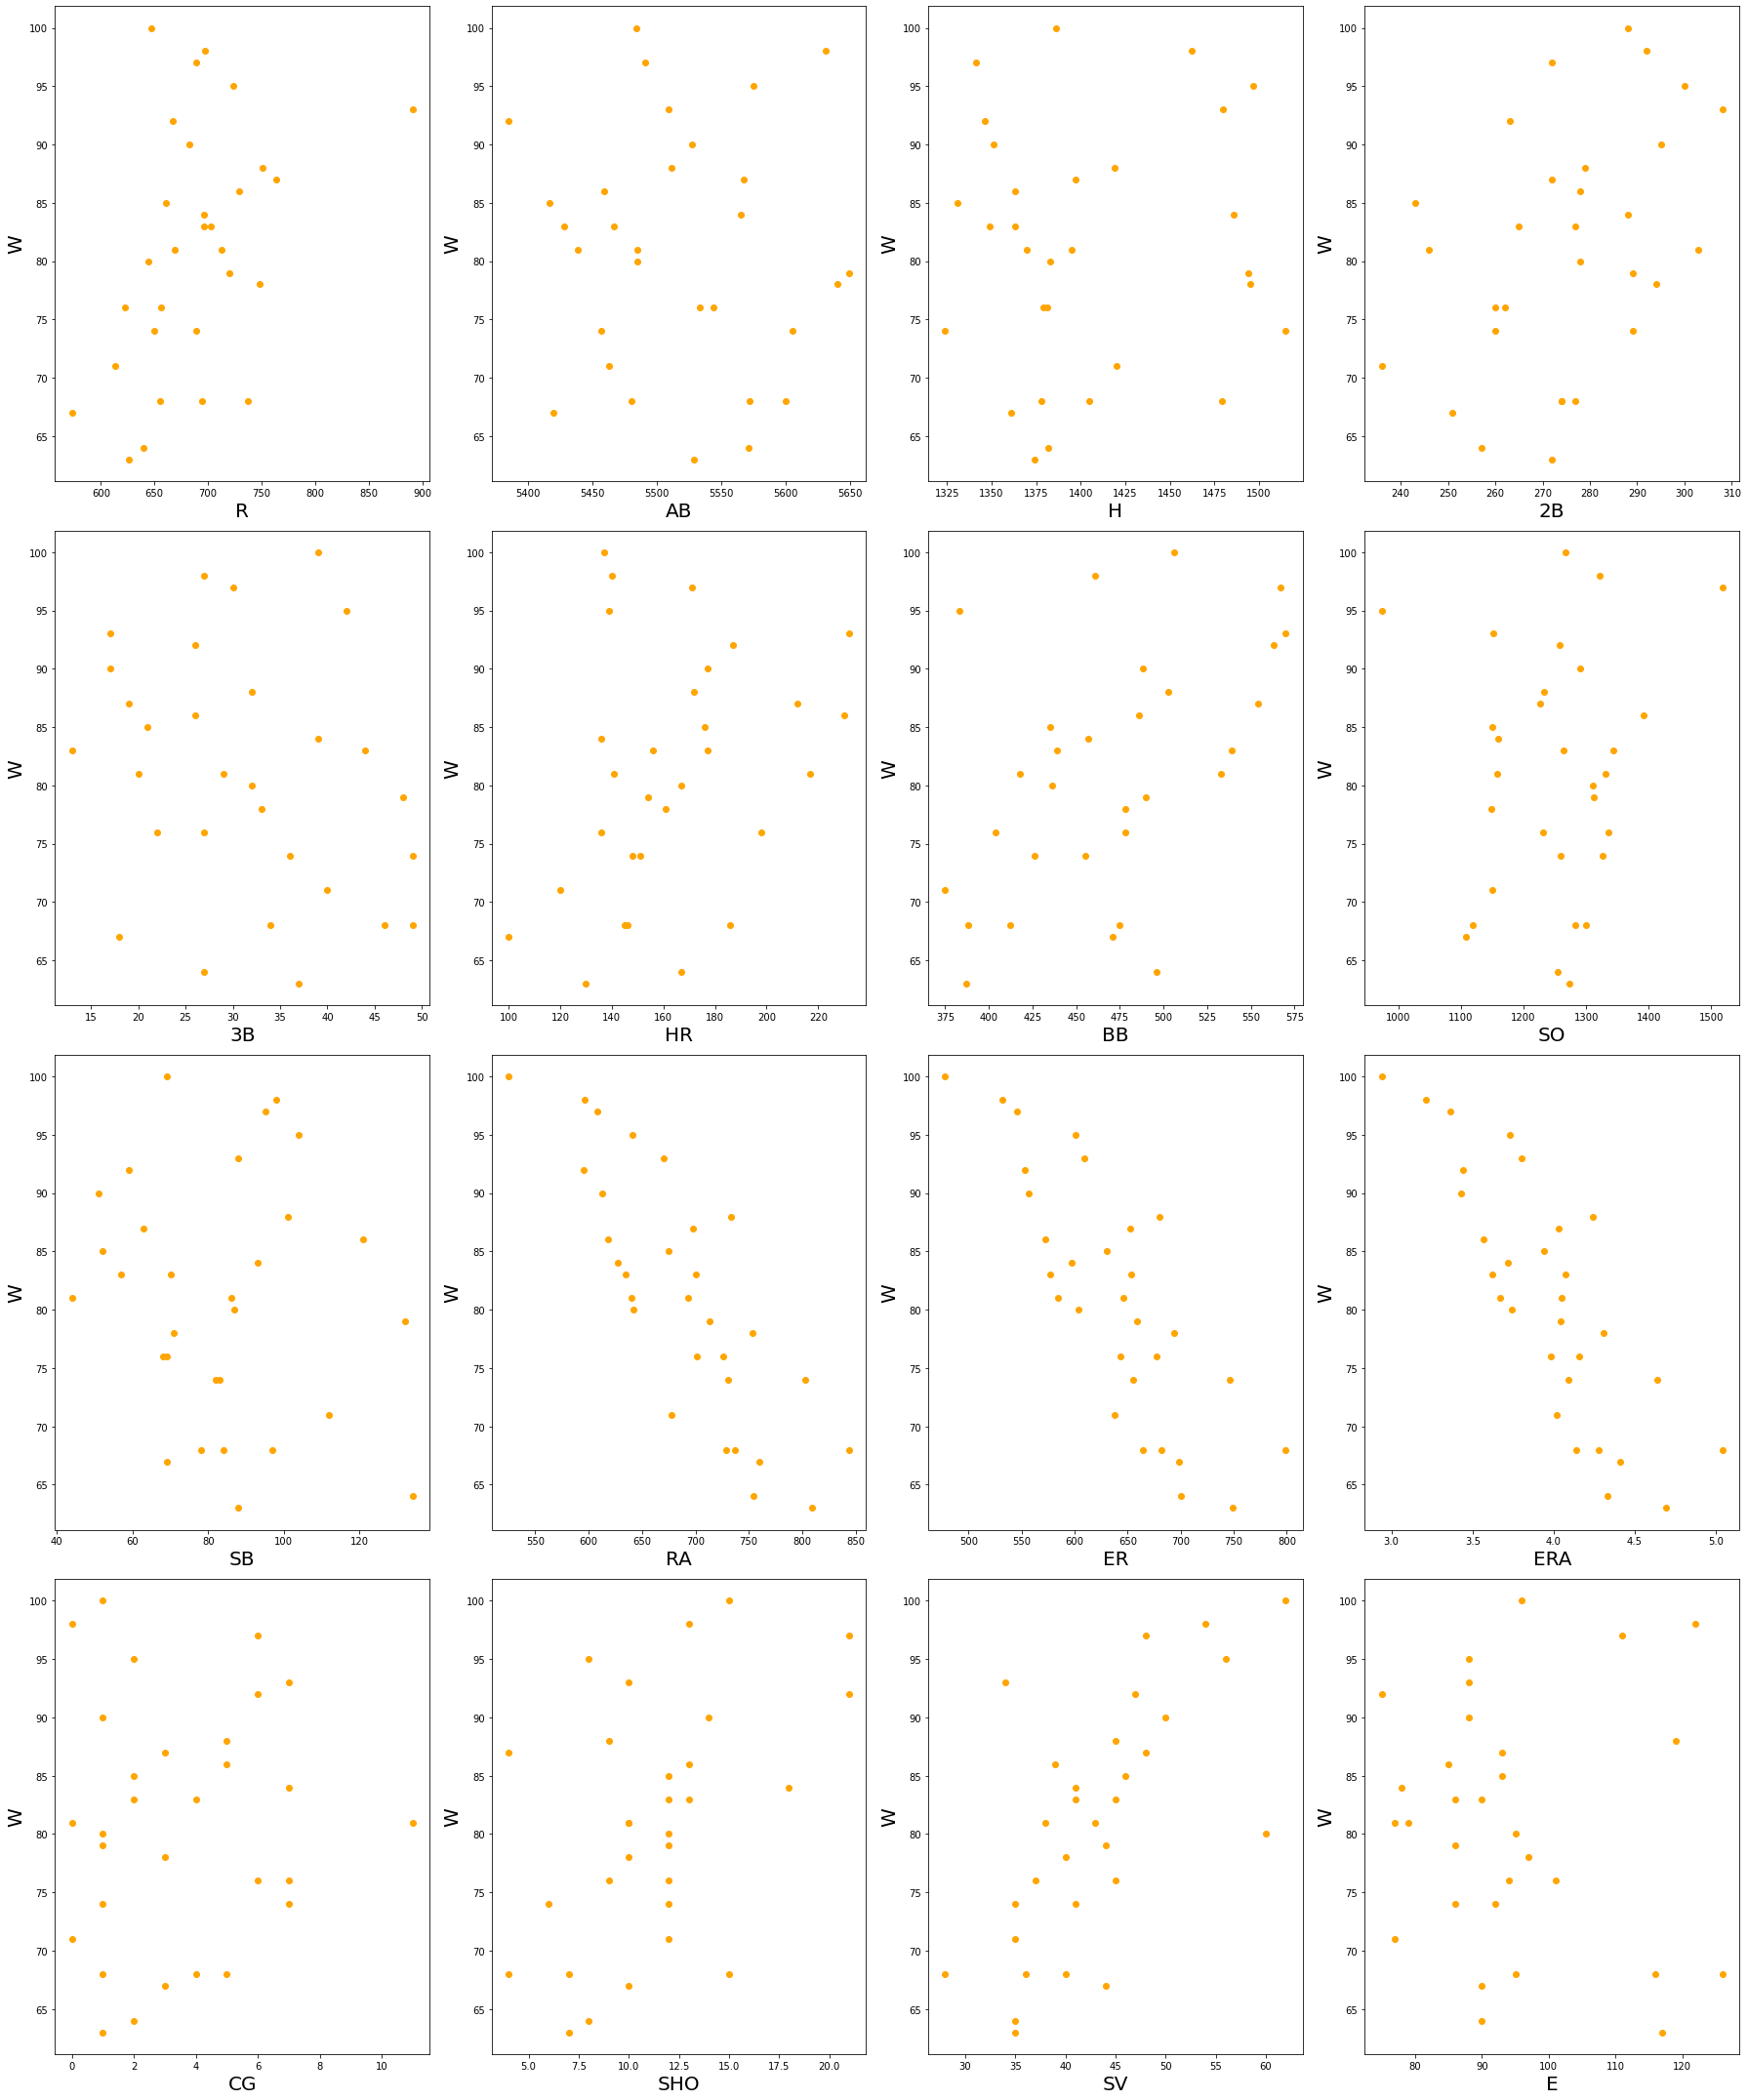

In [11]:
# scatter plot of Every Column Vs Win
plt.figure(figsize = (25,30))
plotnumber = 1

for col in Baseball_data.drop(['W'], axis = 1):
    if plotnumber <=16:
        ax = plt.subplot(4,4,plotnumber)
        plt.scatter(Baseball_data[col],Baseball_data['W'], color='orange')
        plt.xlabel(col,fontsize=20)
        plt.ylabel('W', fontsize=20)
    plotnumber += 1
plt.tight_layout()

Conclusion: R,RA,ER,ERA,SHO,SV appears to have linear relation with Win

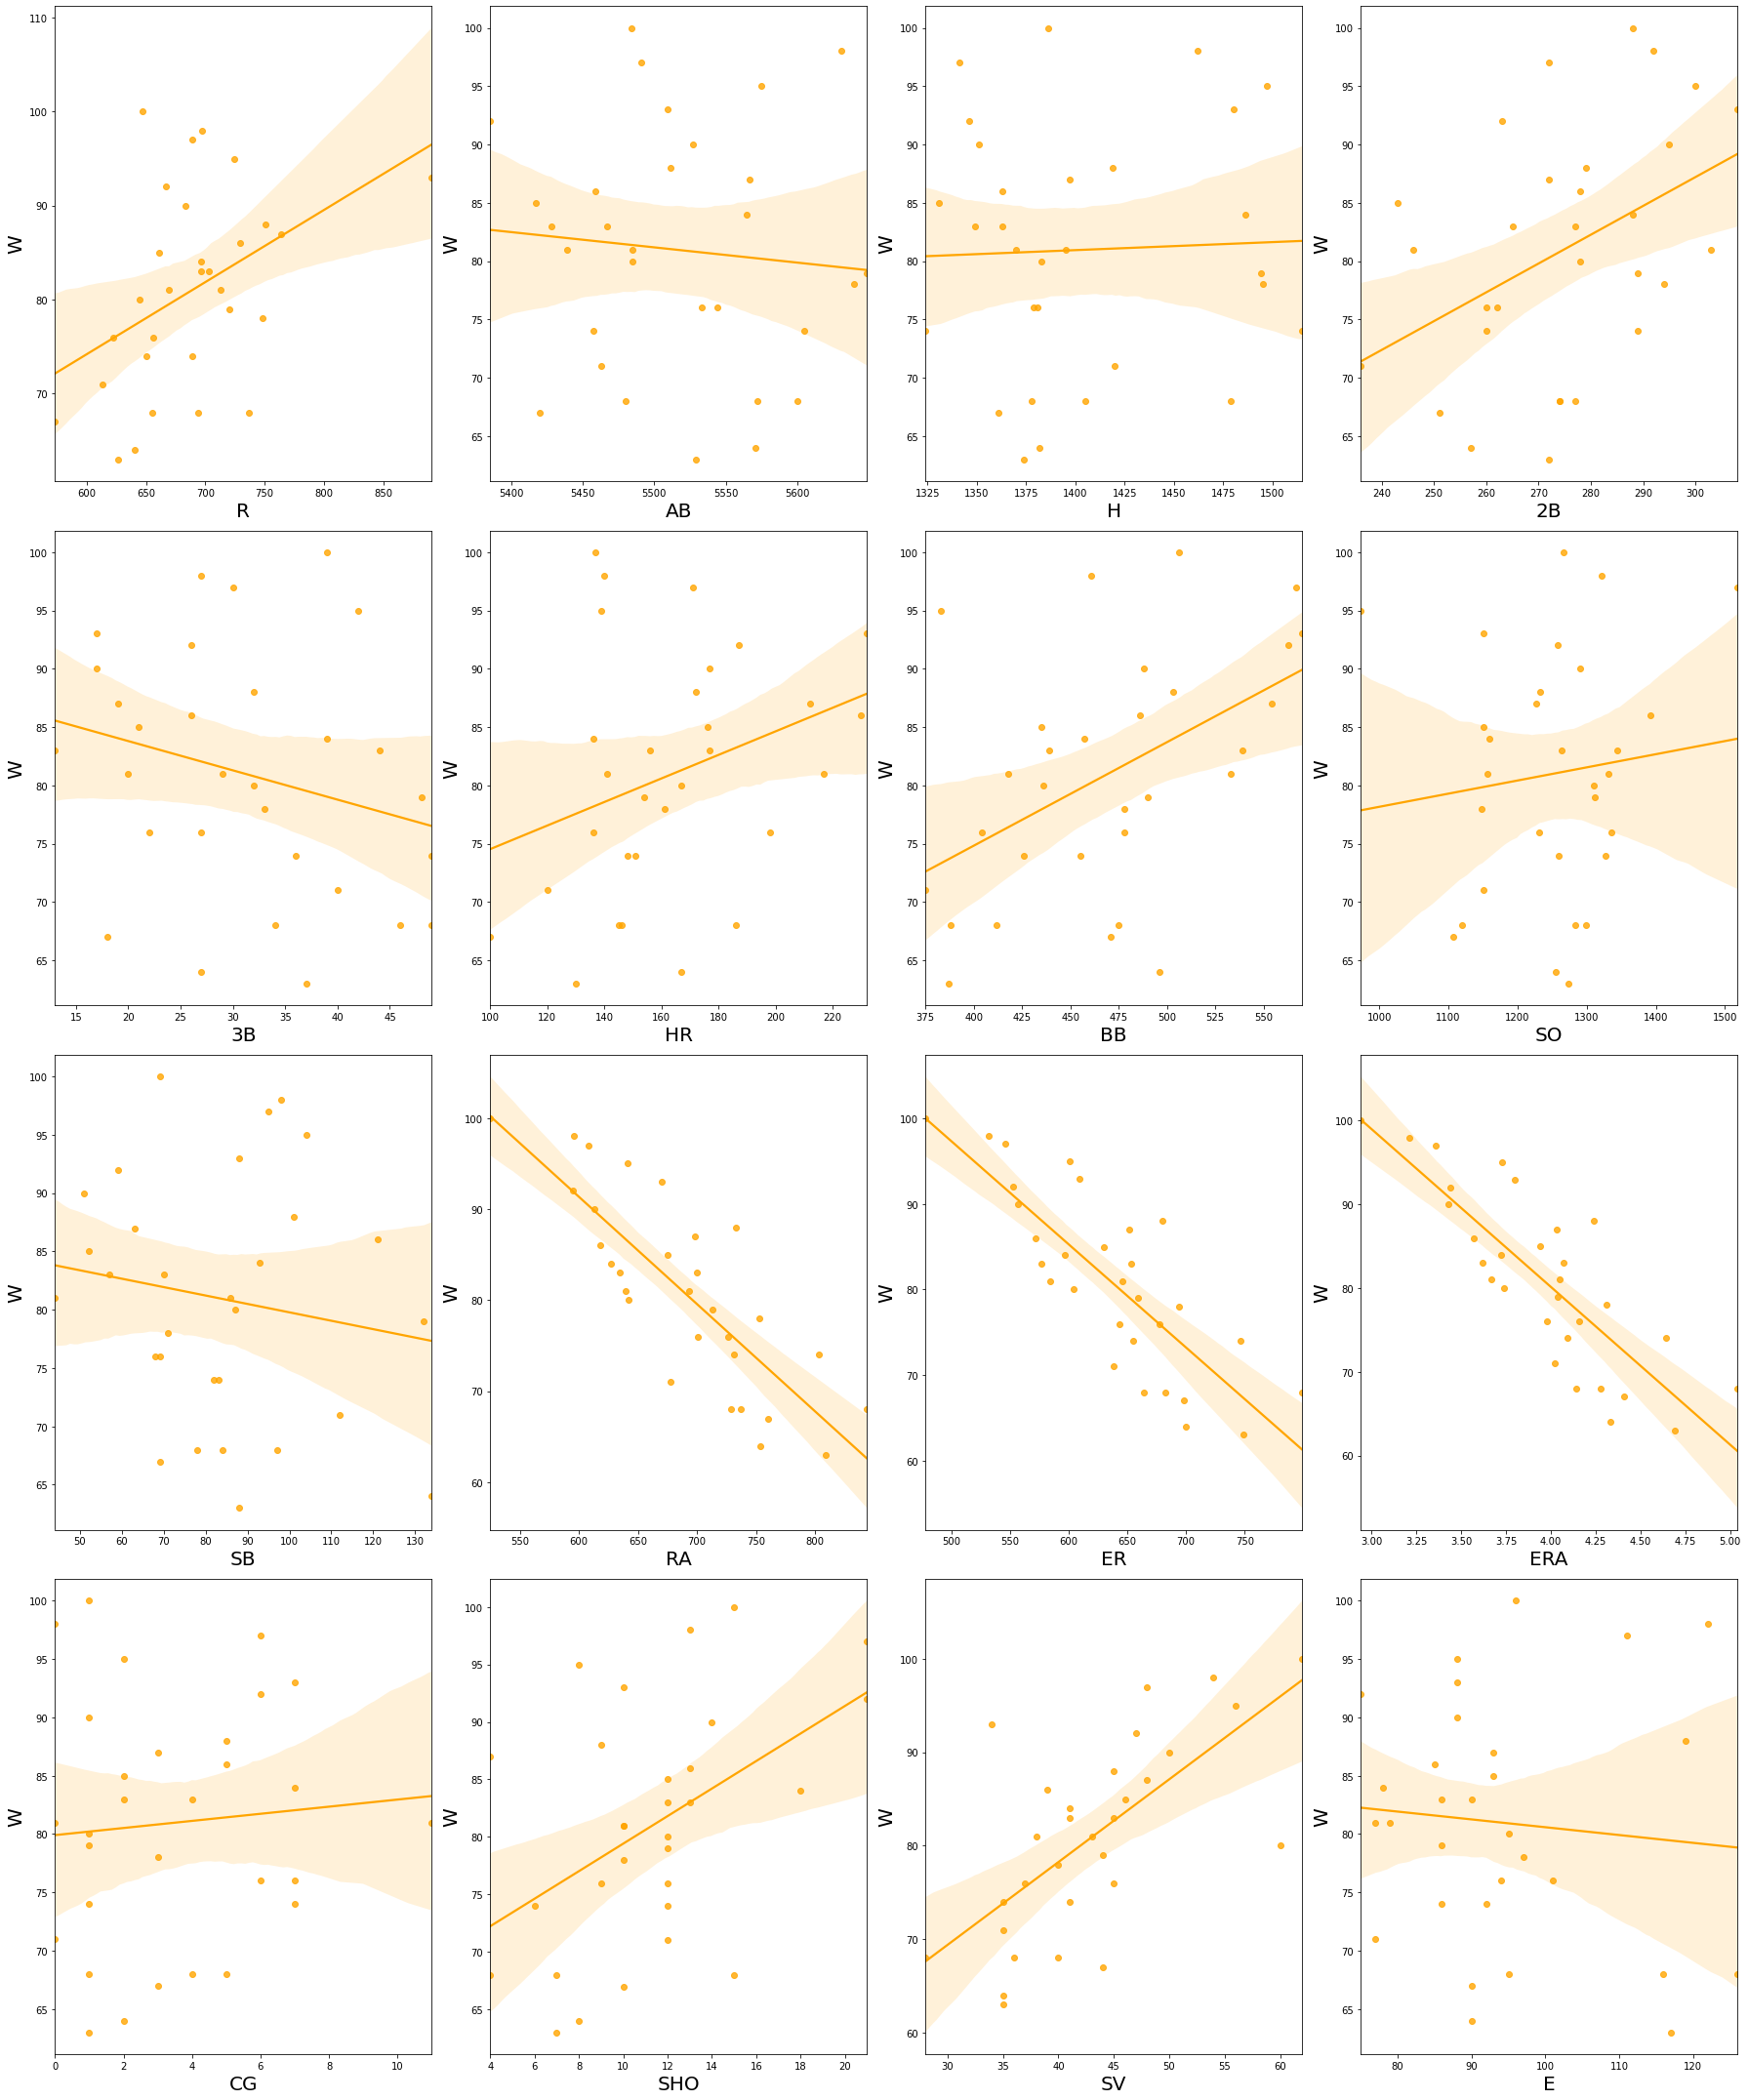

In [12]:
# Regression plot of Every Column Vs Win to confirm the conclusion

plt.figure(figsize = (25,30))
plotnumber = 1

for col in Baseball_data.drop(['W'], axis = 1):
    if plotnumber <=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.regplot(Baseball_data[col],Baseball_data['W'], color='orange')
        plt.xlabel(col,fontsize=20)
        plt.ylabel('W', fontsize=20)
    plotnumber += 1
plt.tight_layout()

Conclusion: RA,ER,ERA have a good fit to regression plot,other are not good fit

## Multivariate analysis

<Figure size 3600x3600 with 0 Axes>

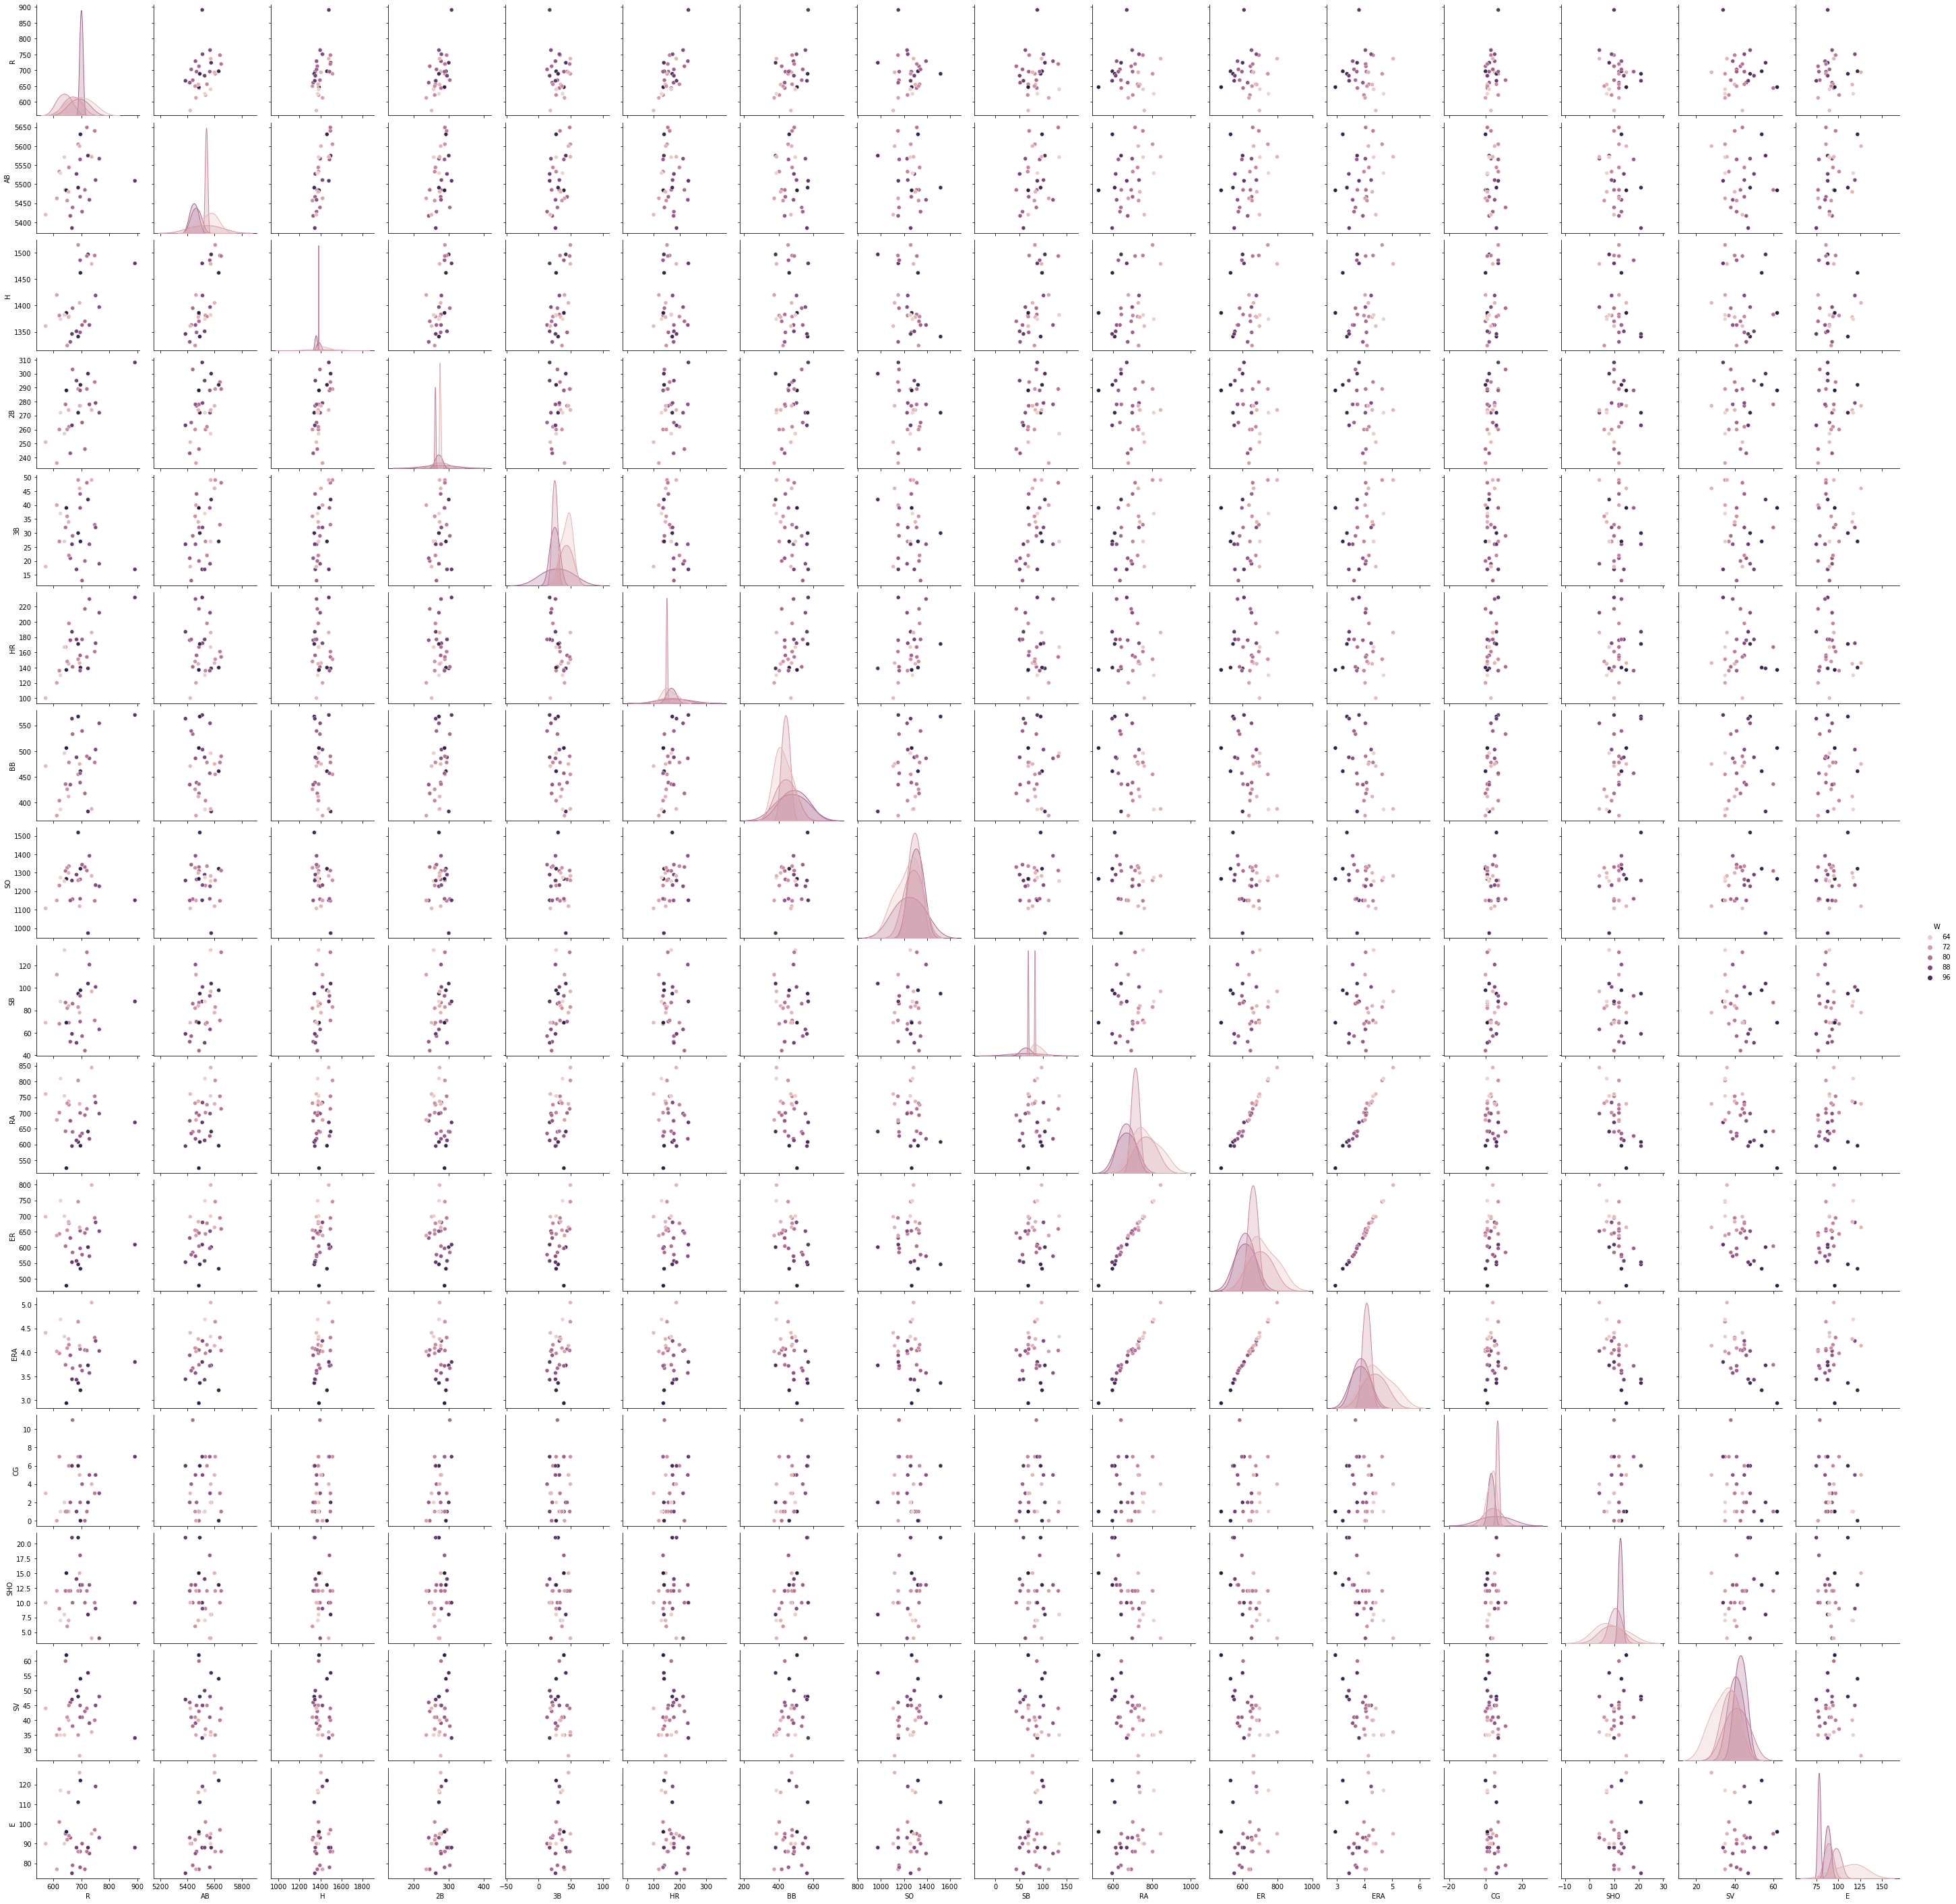

In [13]:
plt.figure(figsize = (50,50))
sns.pairplot(Baseball_data,hue='W')
plt.show()

## Heat map

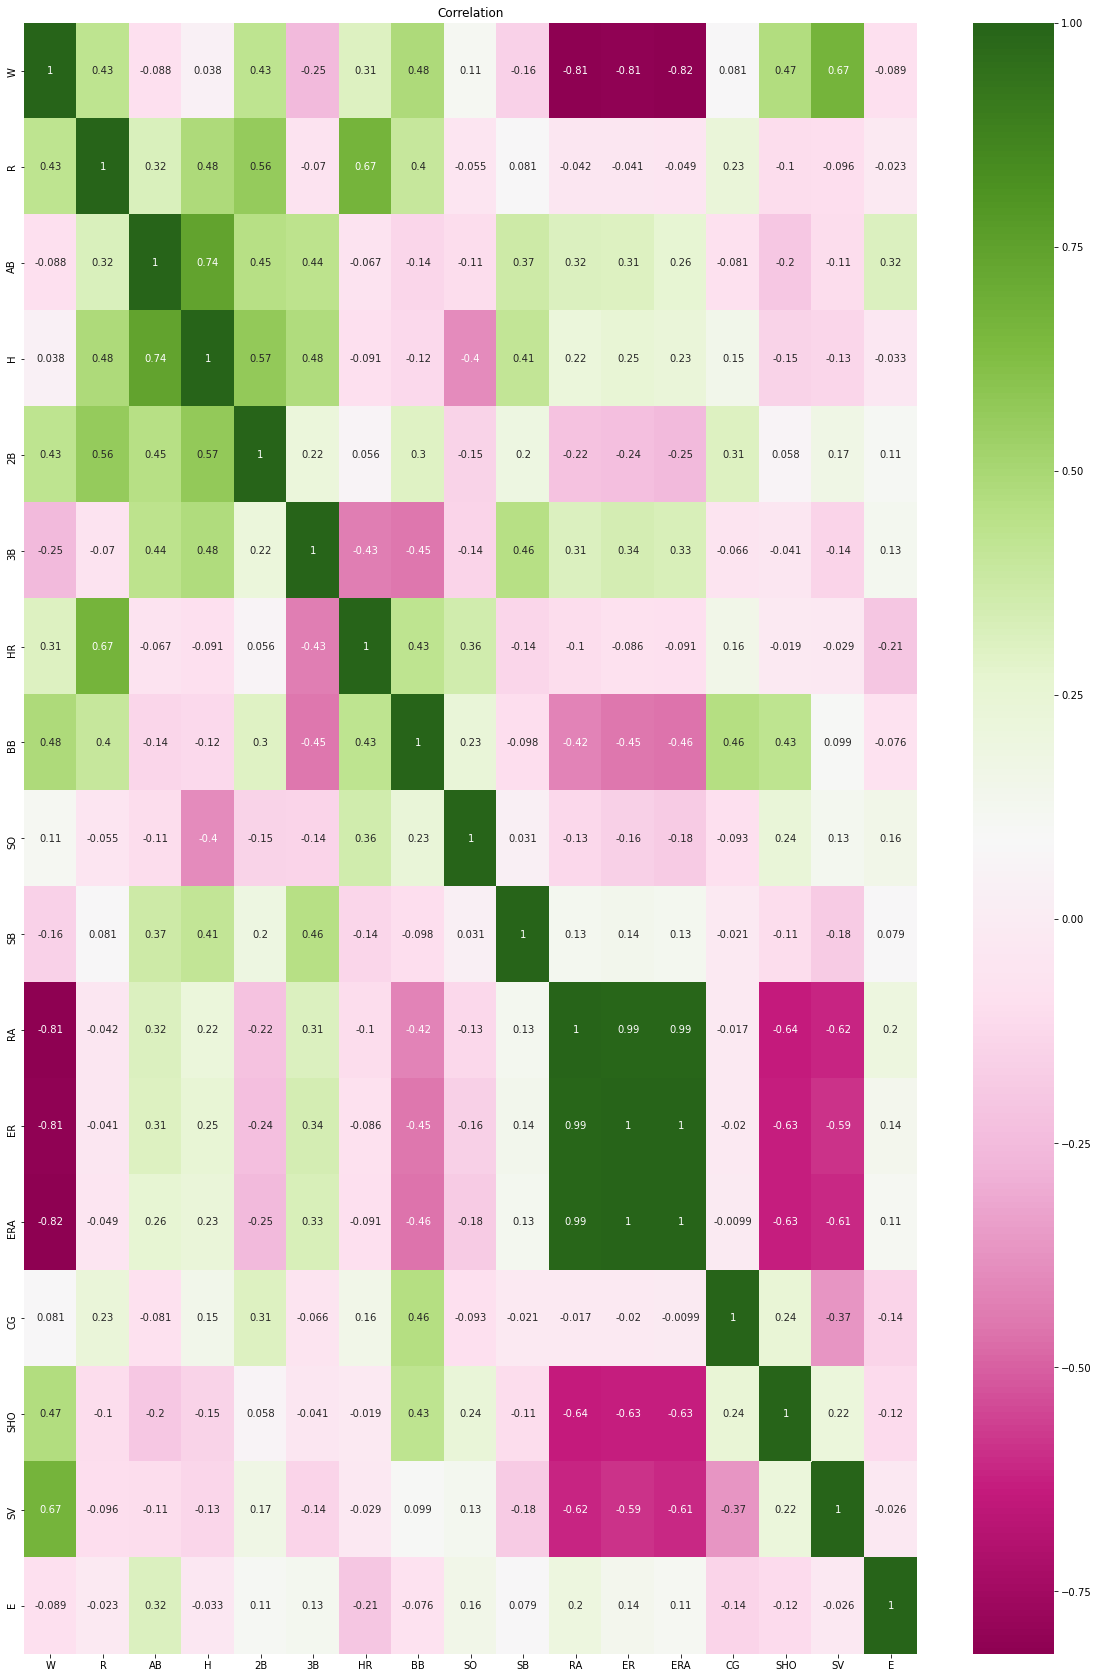

In [14]:
plt.figure(figsize = [20, 30])
sns.heatmap(Baseball_data.corr(),cmap="PiYG", annot = True)
plt.title('Correlation')
plt.show()

Conclusion: ERA,ER,RA are highly related to each other.
            it is a sign of multi-collineraty so we have to remove the two column out these before model building

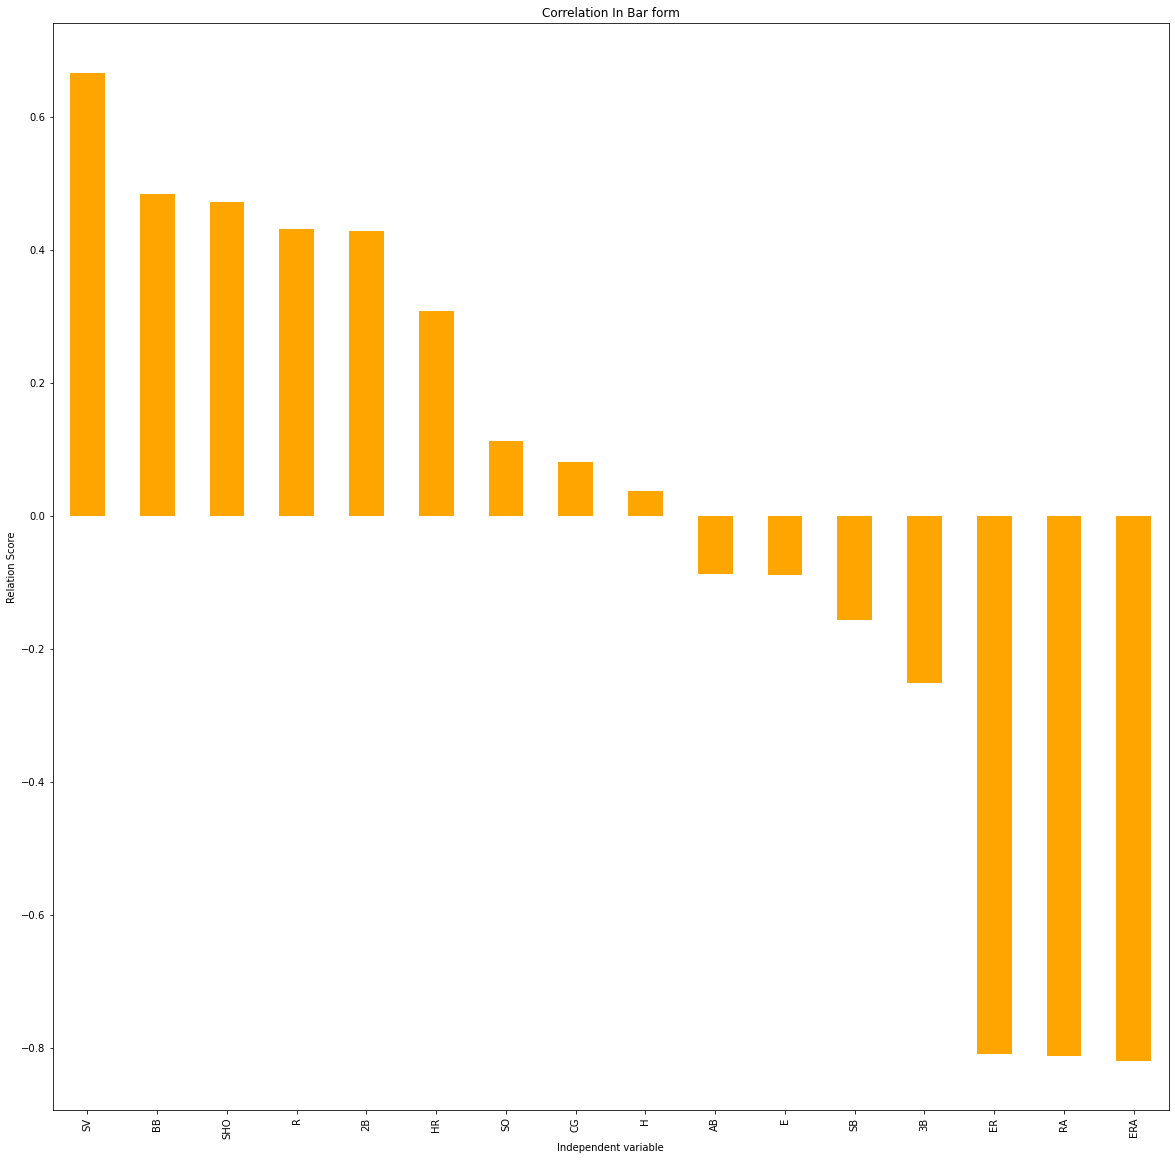

In [15]:
# relation of win with every column
plt.figure(figsize =(20, 20))
Baseball_data.corr()['W'].sort_values(ascending = False).drop(['W']).plot(kind ='bar', color ='Orange')
plt.xlabel('Independent variable')
plt.ylabel('Relation Score')
plt.title('Correlation In Bar form')
plt.show()

Conclusion: confirms multicollinearity with ER,RA,ERA 

# Data Cleaning

In [16]:
#Checking for null values 
Baseball_data.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

## Checking for Outliers in the columns  

<AxesSubplot:>

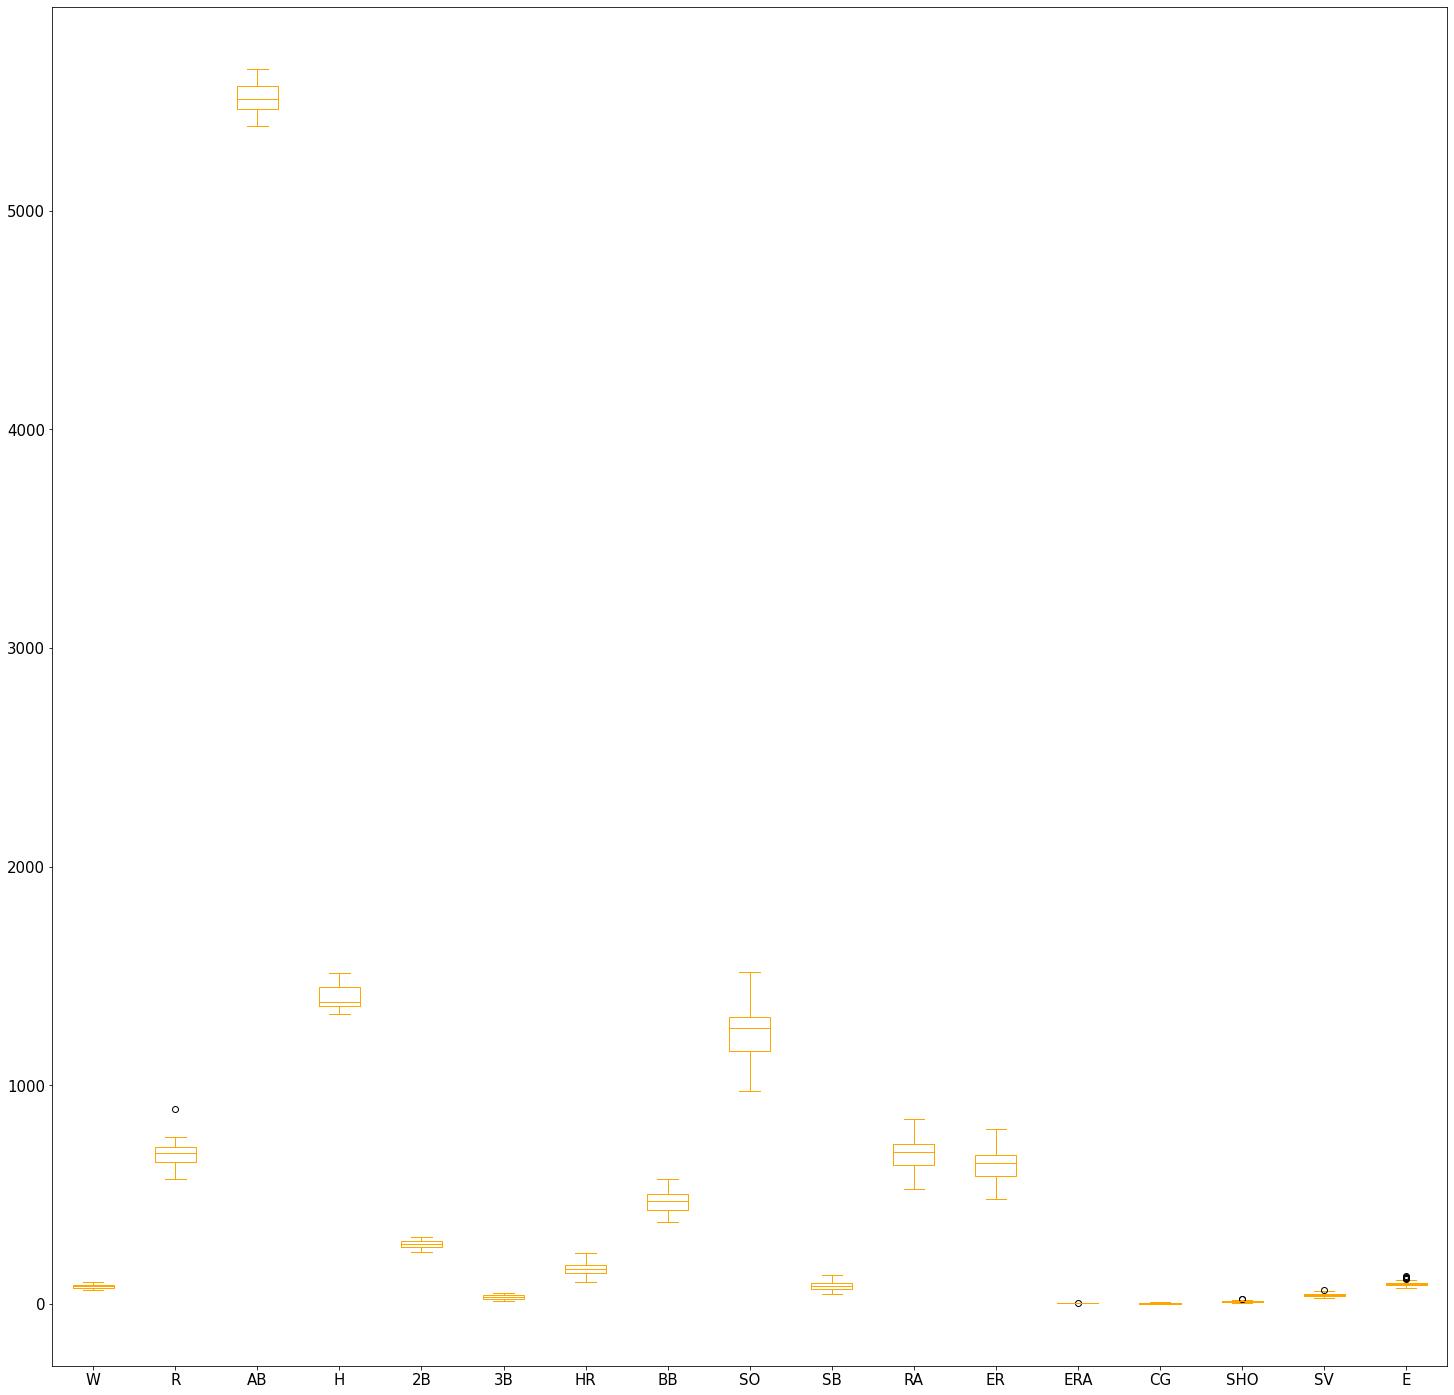

In [17]:
Baseball_data.plot(kind='box',fontsize=15,figsize=(25,25),color='orange')

Conclusion: R,ERA,SHO,SV,E columns have Outliers in them

# Removing Outliers

In [8]:
# chcking for z- scores

from scipy.stats import zscore
z_score=np.abs(zscore(Baseball_data[['R','ERA','SHO','SV','E']]))

# data with z score more then 3
data=Baseball_data[(z_score<3).all(axis=1)]
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [9]:
#Checking shape of new dataset and old data_set
print(Baseball_data.shape)
print(data.shape)

(30, 17)
(29, 17)


### Checking data-loss

In [10]:

Data_loss_ = (((30-29)/30)*100)
print(Data_loss,"%")

NameError: name 'Data_loss' is not defined

if loss would have been more than 5% we would have considered capping of outlier rather than removing

## Code for capping values in columns with Outlier

columns=['R','ERA','SHO','SV','E']

for col in columns:
    Q1 = np.percentile(Baseball_data[col], 25,
                       interpolation = 'midpoint')

    Q3 = np.percentile(Baseball_data[col], 75,
                       interpolation = 'midpoint')
    IQR = Q3 - Q1

    # Upper Limit
    upper_limit=(Q3+1.5*IQR)
    upper = np.where(Baseball_data[col] >= upper_limit)
    
    # Lower Limit
    lower_limit=(Q3-1.5*IQR)
    lower = np.where(Baseball_data[col] <= lower_limit)
    
    if(len(upper>0)):
        for i in upper:
            Baseball_data[col][i]=upper
        
    if(len(lower>0)):
        for j in lower:
            Baseball_data[col][i]=lower



can use this too if not satisfied

In [11]:
## skewness in the cleaned Data

In [12]:
data.skew().sort_values(ascending=False)

CG     0.854980
E      0.840271
H      0.783772
SV     0.627480
SHO    0.526943
SB     0.494966
HR     0.450862
AB     0.169573
BB     0.151193
W      0.119013
3B     0.090124
ER     0.018461
RA     0.018155
ERA    0.016693
R     -0.215364
SO    -0.233815
2B    -0.335304
dtype: float64

A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.
 We have to reduce value in CG,E,H,SV

In [13]:
## log tranform to remove skewness
# for i in data[['CG','E','H','SV','SHO']]:
#     data[i]=np.log(data[i])
# data.skew().sort_values(ascending=False)

# will use another moethod as got CG as Nan
# Other methods to remove skewness: Log transformation, square root transformation, BoxCox transformation

In [14]:
#skewness removal
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer() 
data_power=pt.fit_transform(data)
data_transformed=pd.DataFrame(data_power,columns=data.columns)
data_transformed.skew().sort_values(ascending=False)

E      0.065585
SO     0.051530
SHO    0.000529
HR     0.000448
AB     0.000000
H      0.000000
ERA   -0.000401
SV    -0.000925
ER    -0.004988
BB    -0.008572
SB    -0.009570
RA    -0.011974
W     -0.015560
R     -0.024842
CG    -0.045947
2B    -0.052793
3B    -0.075139
dtype: float64

# we can use below mentioned method also

In [15]:
# #skewness removal
# from sklearn.preprocessing import PowerTransformer
# pt=PowerTransformer(method='yeo-johnson') 
# data_power=pt.fit_transform(data)
# data_transformed=pd.DataFrame(data_power,columns=data.columns)
# data_transformed.skew().sort_values(ascending=False)

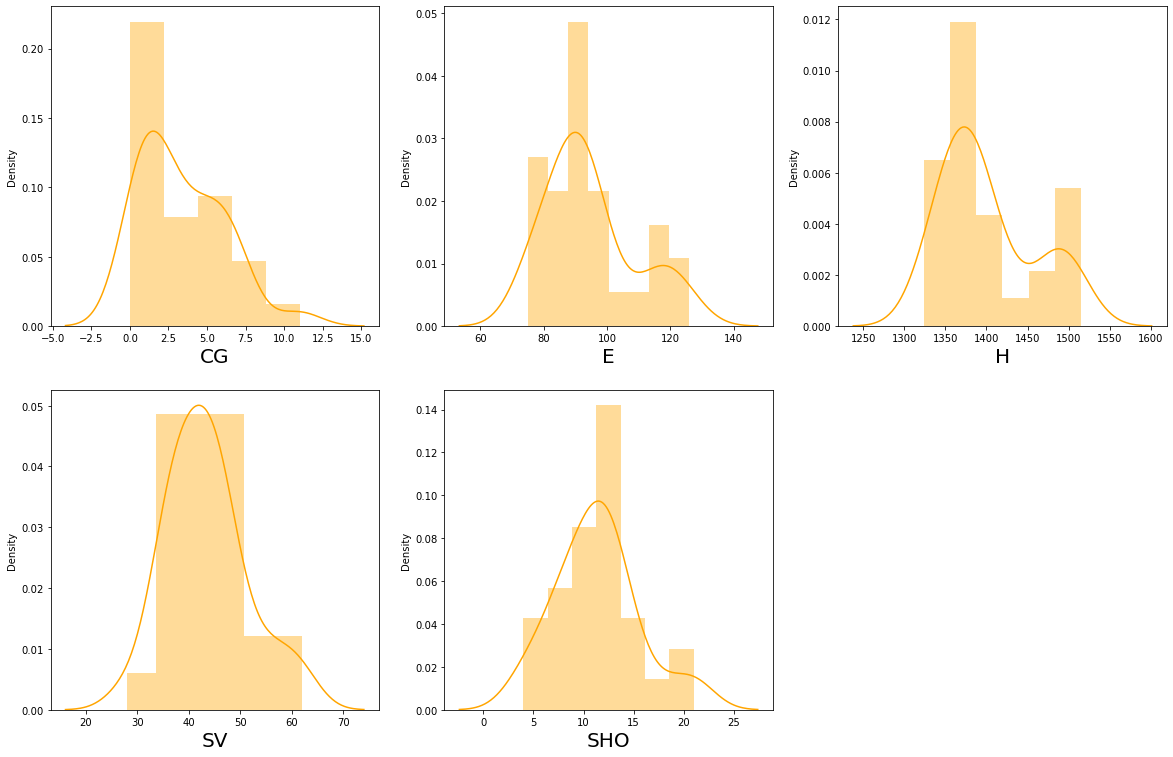

In [29]:
#checking how the data has been distributed in each column of skew_features.

plt.figure(figsize=(20,20))
plotnumber = 1

for column in data[['CG','E','H','SV','SHO']]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column],color='Orange')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Splitting  Dependent and Independent Variable

In [16]:
features = data.drop("W",axis=1)
target = data["W"]

In [17]:
# scaling the features
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
Features = pd.DataFrame(SC.fit_transform(features), columns=features.columns)

# Variance inflation factor (checking for multi-collinearity)

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.Series([variance_inflation_factor(Features.values, i) 
               for i in range(Features.shape[1])], index=Features.columns)

R         7.229564
AB       18.333377
H        10.558458
2B        3.743423
3B        3.278636
HR        8.426403
BB        3.431971
SO        2.720640
SB        2.110804
RA      197.315706
ER     1825.871631
ERA    1438.816208
CG        3.074115
SHO       3.673885
SV        6.236487
E         2.180914
dtype: float64

# As i stated earlier too their is multicollinearity in the data we need to remove it

In [19]:
Features.drop(['ER'], axis = 1,inplace=True)
pd.Series([variance_inflation_factor(Features.values, i) 
               for i in range(Features.shape[1])], index=Features.columns)

R        6.789990
AB       7.689961
H        9.703669
2B       3.423326
3B       3.268301
HR       7.683683
BB       3.430050
SO       2.713114
SB       1.907595
RA     144.425392
ERA    139.967064
CG       2.649316
SHO      3.498198
SV       3.174949
E        2.092189
dtype: float64

In [20]:
Features.drop(['RA'], axis = 1,inplace=True)
pd.Series([variance_inflation_factor(Features.values, i) 
               for i in range(Features.shape[1])], index=Features.columns)

R      6.787762
AB     4.981743
H      8.569581
2B     3.416116
3B     3.239565
HR     6.590925
BB     3.081560
SO     2.106522
SB     1.842528
ERA    4.931066
CG     2.649063
SHO    3.231029
SV     3.075865
E      2.039641
dtype: float64

## Multi-collinearity Removed
## column ER and RA were removed due to high co-relativity

In [21]:
## Model - Building

In [56]:
from sklearn import datasets, linear_model, metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


Maximum_Accuracy=0

test_size=[0.2,0.21,0.22,0.23,0.24,0.25]

over_fitting=1

for j in test_size:
    for i in range(200):
        x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=j,
                                                        random_state=i)

        model=LinearRegression()
        model.fit(x_train,y_train)
        pred= model.predict(x_test)
        acc=r2_score(y_test,pred)
        check=model.predict(x_train)
        check_acc=r2_score(y_train,check)
        
        diff=abs(acc-check_acc)
        if(over_fitting>diff):
            over_fitting=diff
            if acc>Maximum_Accuracy:
                Maximum_Accuracy=acc
                print("R-square",Maximum_Accuracy,"Train set accuracy",check_acc,'Random state',i,'test_size',j)

R-square 0.31385002082951163 Train set accuracy 0.9783442032164974 Random state 0 test_size 0.2
R-square 0.768442066186319 Train set accuracy 0.9559822468233036 Random state 1 test_size 0.2
R-square 0.8905336067161719 Train set accuracy 0.9304708562486326 Random state 3 test_size 0.2
R-square 0.9408695174975362 Train set accuracy 0.9257500401907344 Random state 6 test_size 0.2


# we will consider random state=6 and test size=0.2 as this has almost same accuracy on both train and test dataset

In [57]:
x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=0.2,random_state=6)

In [58]:
#Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

## 1.Linear-Regression

In [59]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
print(lr.score(x_train,y_train))

0.9257500401907344


In [60]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print('MSE:',mean_squared_error(lr_pred,y_test))
print('MAE:',mean_absolute_error(lr_pred,y_test))
print('r2_score:',r2_score(lr_pred,y_test))

MSE: 8.77923413821302
MAE: 2.5920739511355557
r2_score: 0.9114667690104304


In [48]:
model_name=[]
mse=[]
mae=[]
R_sq=[]
rmse=[]



ValueError: Found input variables with inconsistent numbers of samples: [6, 7]

In [61]:
mse.append(mean_squared_error(lr_pred,y_test))
mae.append(mean_absolute_error(lr_pred,y_test))
R_sq.append(r2_score(lr_pred,y_test))
model_name.append("linear_regression")
rmse.append(np.sqrt(metrics.mean_squared_error(y_test,lr_pred)))

# 2.Lasso Regression

In [62]:
Maximum_Accuracy=0

test_size=[0.2,0.21,0.22,0.23,0.24,0.25]

over_fitting=1

for j in test_size:
    for i in range(200):
        x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=j,
                                                        random_state=i)

        model=Lasso()
        model.fit(x_train,y_train)
        pred= model.predict(x_test)
        acc=r2_score(y_test,pred)
        check=model.predict(x_train)
        check_acc=r2_score(y_train,check)
        
        diff=abs(acc-check_acc)
        if(over_fitting>diff):
            over_fitting=diff
            if acc>Maximum_Accuracy:
                Maximum_Accuracy=acc
                print("R-square",Maximum_Accuracy,"Train set accuracy",check_acc,'Random state',i,'test_size',j)

R-square 0.7544282826843826 Train set accuracy 0.9000730300789601 Random state 0 test_size 0.2
R-square 0.9217531844646105 Train set accuracy 0.8533808685974696 Random state 1 test_size 0.2


In [63]:
x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=0.2,random_state=1)

In [64]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10]}
lasso=Lasso()
LS=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error')
LS.fit(x_train,y_train)
print(LS.best_params_)

{'alpha': 1}


In [65]:
ls=Lasso(alpha=1)
ls.fit(x_train,y_train)
ls_pred=ls.predict(x_test)
print('R2_score:',r2_score(y_test,ls_pred))
print('mse:',metrics.mean_squared_error(y_test,ls_pred))
print('mae:',metrics.mean_absolute_error(y_test,ls_pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,ls_pred)))

R2_score: 0.9217531844646105
mse: 10.928471903109404
mae: 2.4738656033815025
rmse: 3.3058239371009166


In [66]:
mse.append(mean_squared_error(ls_pred,y_test))
mae.append(mean_absolute_error(ls_pred,y_test))
R_sq.append(r2_score(y_test,ls_pred))
model_name.append("lasso_regression")
rmse.append(np.sqrt(metrics.mean_squared_error(y_test,ls_pred)))

# 3.Ridge-Regression

In [67]:
Maximum_Accuracy=0

test_size=[0.2,0.21,0.22,0.23,0.24,0.25]

over_fitting=1

for j in test_size:
    for i in range(200):
        x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=j,
                                                        random_state=i)

        model=Ridge()
        model.fit(x_train,y_train)
        pred= model.predict(x_test)
        acc=r2_score(y_test,pred)
        check=model.predict(x_train)
        check_acc=r2_score(y_train,check)
        
        diff=abs(acc-check_acc)
        if(over_fitting>diff):
            over_fitting=diff
            if acc>Maximum_Accuracy:
                Maximum_Accuracy=acc
                print("R-square",Maximum_Accuracy,"Train set accuracy",check_acc,'Random state',i,'test_size',j)

R-square 0.39327010937093976 Train set accuracy 0.9703690919466621 Random state 0 test_size 0.2
R-square 0.9090310035622903 Train set accuracy 0.9401561564315244 Random state 1 test_size 0.2
R-square 0.9224910084890776 Train set accuracy 0.9296237123407992 Random state 99 test_size 0.2


In [68]:
x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=0.2,random_state=99)

In [69]:
parameters={"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],'solver':['auto','svd','cholesky','lsqr']}
ridge=Ridge()
RR=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error')
RR.fit(x_train,y_train)
print(RR.best_params_)

{'alpha': 5, 'solver': 'lsqr'}


In [70]:
rr=Ridge(alpha=5,solver='lsqr')
rr.fit(x_train,y_train)
rr_pred=rr.predict(x_test)
print('R2_score:',r2_score(y_test,rr_pred))
print('mse:',metrics.mean_squared_error(y_test,rr_pred))
print('mae:',metrics.mean_absolute_error(y_test,rr_pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,rr_pred)))

R2_score: 0.8642701798185722
mse: 20.70633812323337
mae: 3.898593155163217
rmse: 4.550421752237189


In [71]:
mse.append(mean_squared_error(rr_pred,y_test))
mae.append(mean_absolute_error(rr_pred,y_test))
R_sq.append(r2_score(y_test,rr_pred))
model_name.append("ridge_regression")
rmse.append(np.sqrt(metrics.mean_squared_error(y_test,rr_pred)))

# 4. Random Forest

In [70]:
Maximum_Accuracy=0

test_size=[0.2,0.21,0.22,0.23,0.24,0.25]

over_fitting=1

for j in test_size:
    for i in range(200):
        x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=j,
                                                        random_state=i)

        model=RandomForestRegressor()
        model.fit(x_train,y_train)
        pred= model.predict(x_test)
        acc=r2_score(y_test,pred)
        check=model.predict(x_train)
        check_acc=r2_score(y_train,check)
        
        diff=abs(acc-check_acc)
        if(over_fitting>diff):
            over_fitting=diff
            if acc>Maximum_Accuracy:
                Maximum_Accuracy=acc
                print("R-square",Maximum_Accuracy,"Train set accuracy",check_acc,'Random state',i,'test_size',j)

R-square 0.6605810422960727 Train set accuracy 0.9365996886306708 Random state 0 test_size 0.2
R-square 0.6730536992840095 Train set accuracy 0.9385904341191117 Random state 1 test_size 0.2
R-square 0.7269380181347147 Train set accuracy 0.9134943048210149 Random state 3 test_size 0.2
R-square 0.736117174254317 Train set accuracy 0.9222994038801979 Random state 4 test_size 0.2
R-square 0.7627850194552531 Train set accuracy 0.9194564390713519 Random state 113 test_size 0.2
R-square 0.8434246650426312 Train set accuracy 0.9349980668240934 Random state 129 test_size 0.2
R-square 0.852767109760729 Train set accuracy 0.9152820657228479 Random state 143 test_size 0.2
R-square 0.8796662073797289 Train set accuracy 0.9306049716127053 Random state 129 test_size 0.21


In [46]:
x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=0.21,random_state=129)

In [47]:
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
RF_pred=RF.predict(x_test)
print('R2_score:',r2_score(y_test,RF_pred))
print('mse:',metrics.mean_squared_error(y_test,RF_pred))
print('mae:',metrics.mean_absolute_error(y_test,RF_pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,RF_pred)))

R2_score: 0.873894885567492
mse: 11.020042857142844
mae: 2.7385714285714267
rmse: 3.319644989625072


In [49]:
mse.append(mean_squared_error(RF_pred,y_test))
mae.append(mean_absolute_error(RF_pred,y_test))
R_sq.append(r2_score(y_test,RF_pred))
model_name.append("Random_forest_regression")
rmse.append(np.sqrt(metrics.mean_squared_error(y_test,RF_pred)))

# 5. Xgboost-Regressor

In [50]:
Maximum_Accuracy=0

test_size=[0.2,0.21,0.22,0.23,0.24,0.25]

over_fitting=1

for j in test_size:
    for i in range(200):
        x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=j,
                                                        random_state=i)

        model=XGBRegressor()
        model.fit(x_train,y_train)
        pred= model.predict(x_test)
        acc=r2_score(y_test,pred)
        check=model.predict(x_train)
        check_acc=r2_score(y_train,check)
        
        diff=abs(acc-check_acc)
        if(over_fitting>diff):
            over_fitting=diff
            if acc>Maximum_Accuracy:
                Maximum_Accuracy=acc
                print("R-square",Maximum_Accuracy,"Train set accuracy",check_acc,'Random state',i,'test_size',j)

R-square 0.5592745734592182 Train set accuracy 0.9999999982146546 Random state 0 test_size 0.2
R-square 0.6554973379787734 Train set accuracy 0.9999999980401426 Random state 1 test_size 0.2
R-square 0.6658332821850822 Train set accuracy 0.9999999967059867 Random state 3 test_size 0.2
R-square 0.7831576661711919 Train set accuracy 0.9999999975657383 Random state 4 test_size 0.2
R-square 0.8206206878339972 Train set accuracy 0.9999999979130338 Random state 11 test_size 0.2
R-square 0.8956192717076056 Train set accuracy 0.9999999976749325 Random state 13 test_size 0.2
R-square 0.911982261235178 Train set accuracy 0.9999999975466991 Random state 146 test_size 0.2


In [51]:
x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=0.2,random_state=146)

In [52]:
xgb1 = XGBRegressor()
parameters = {'learning_rate': [0.1,0.01,1],
              'max_depth': [3,5,7,9],
              'n_estimators': [1,3,5,7,10],
              "gamma":[ 0.0, 0.1, 0.2,0.3]}

xgb_grid = GridSearchCV(xgb1,parameters)

xgb_grid.fit(x_train, y_train)
print(xgb_grid.best_params_)

{'gamma': 0.1, 'learning_rate': 1, 'max_depth': 3, 'n_estimators': 5}


In [53]:
Xg=XGBRegressor(gamma=0.1,learning_rate= 1,max_depth= 3,n_estimators= 5)
Xg.fit(x_train,y_train)
Xg_pred=rr.predict(x_test)
print('R2_score:',r2_score(y_test,Xg_pred))
print('mse:',metrics.mean_squared_error(y_test,Xg_pred))
print('mae:',metrics.mean_absolute_error(y_test,Xg_pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,Xg_pred)))

R2_score: 0.9352863200426471
mse: 5.337080994260574
mae: 1.6438136146342117
rmse: 2.3102123266618966


In [54]:
mse.append(mean_squared_error(Xg_pred,y_test))
mae.append(mean_absolute_error(Xg_pred,y_test))
R_sq.append(r2_score(y_test,Xg_pred))
model_name.append("XGboost_regression")
rmse.append(np.sqrt(metrics.mean_squared_error(y_test,Xg_pred)))

In [72]:
data = list(zip(model_name,mse,mae,rmse,R_sq))                                           
df = pd.DataFrame(data,columns=["Model","Mean_Sq_Error","Mean_Absolute_Error","Root Mean Squared Error",'R_sq'])                    #Creating DataFrame    
df

,Model,Mean_Sq_Error,Mean_Absolute_Error,Root Mean Squared Error,R_sq
0,Random_forest_regression,11.020043,2.738571,3.319645,0.873895
1,XGboost_regression,5.337081,1.643814,2.310212,0.935286
2,linear_regression,8.779234,2.592074,2.962977,0.911467
3,lasso_regression,10.928472,2.473866,3.305824,0.921753
4,ridge_regression,20.706338,3.898593,4.550422,0.864270


## Conclusion: We are best results with XGBoost Regressor but the model is overfitted 
## thus we will pick the model linear Regression 

# Maximum R- squared was 0.91

In [74]:
#pickle file of the model

In [75]:
import pickle
# # saved the trained model in file with given name
pickle_out = open("BaseBallCaseStudy.pkl","wb") # name of my pickle file , wb -write
pickle.dump(lr, pickle_out)
pickle_out.close()

In [76]:
# loading the pickeled model
pickle_in = open("BaseBallCaseStudy.pkl","rb") # rb -> read the pickel file
trained_model = pickle.load(pickle_in)

In [77]:
pd.DataFrame([trained_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5
Predicted,67.474172,60.778379,96.650633,77.670407,87.789517,89.221837
Original,67.000000,63.000000,97.000000,76.000000,83.000000,92.000000


## Done with the Baseball Problem